In [2]:
from torch.utils.data import Dataset , DataLoader
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
data_folder='~/data/FMNIST'
fmnist=datasets.FashionMNIST(data_folder,download=True,train=True)

In [3]:
tr_images=fmnist.data
tr_targets=fmnist.targets

In [4]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x=torch.tensor(x).float()
        x=x.view(-1,28*28)
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
        
    def __getitem__(self, index):
        return self.x[index],self.y[index]
    


In [5]:
#create a function
def get_data(tr_images,tr_targets):
    ds=FMNISTDataset(tr_images,tr_targets)
    dl=DataLoader(ds,batch_size=32,shuffle=True)
    return dl


In [9]:
from torch.optim import SGD
def get_model():
    model=nn.Sequential(
        nn.Linear(784,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    )
    loss_fn=nn.CrossEntropyLoss()
    optimizer=torch.optim.SGD(model.parameters(),lr=1e-2)
    return model,loss_fn,optimizer


In [10]:
# Note that we are not using “softmax” in the neural network at all. The range
# of outputs is unconstrained, in that values can have an infinite range, whereas
# cross-entropy loss typically expects outputs as probabilities (each row should
# sum to 1). Unconstrained values in output still work in this setting because
# nn.CrossEntropyLoss actually expects us to send the raw logits (that is, unconstrained values). It performs softmax internally.

In [17]:
def train_batch(x,y,model,opt,loss_fn):
        model.train

        opt.zero_grad()

        loss_val=loss_fn(model(x),y)

        print(loss_val)

        loss_val.backward()

        optimizer.step()
        return loss_val.item()


@torch.no_grad()
def accuracy (x,y,model):
        model.eval()
        pred=model(x)
        max_values,argmaxes=pred.max(-1)

        is_correct=argmaxes==y

        return is_correct.numpy().tolist()
        

In [18]:
trn_dl=get_data(tr_images,tr_targets)
model,loss_fn,optimizer=get_model()


C:\Users\karti\AppData\Local\Temp\ipykernel_4264\1048398784.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x=torch.tensor(x).float()


In [26]:
losses,accuracies=[],[]
for epoch in range(5):
    print(epoch)
    epoch_losses,epoch_accuracies=[],[]

    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        batch_loss=train_batch(x,y,model,optimizer,loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss=np.array(epoch_losses).mean()

    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        is_correct=accuracy(x,y,model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy=np.mean(epoch_accuracies)

    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)



0
tensor(2.1787, grad_fn=<NllLossBackward0>)
tensor(2.2234, grad_fn=<NllLossBackward0>)
tensor(2.2370, grad_fn=<NllLossBackward0>)
tensor(2.2629, grad_fn=<NllLossBackward0>)
tensor(2.1995, grad_fn=<NllLossBackward0>)
tensor(2.2953, grad_fn=<NllLossBackward0>)
tensor(2.2090, grad_fn=<NllLossBackward0>)
tensor(2.2085, grad_fn=<NllLossBackward0>)
tensor(2.2941, grad_fn=<NllLossBackward0>)
tensor(2.2331, grad_fn=<NllLossBackward0>)
tensor(2.0942, grad_fn=<NllLossBackward0>)
tensor(2.3051, grad_fn=<NllLossBackward0>)
tensor(2.2105, grad_fn=<NllLossBackward0>)
tensor(2.2372, grad_fn=<NllLossBackward0>)
tensor(2.2109, grad_fn=<NllLossBackward0>)
tensor(2.0827, grad_fn=<NllLossBackward0>)
tensor(2.1518, grad_fn=<NllLossBackward0>)
tensor(2.1666, grad_fn=<NllLossBackward0>)
tensor(2.2614, grad_fn=<NllLossBackward0>)
tensor(1.9996, grad_fn=<NllLossBackward0>)
tensor(2.1372, grad_fn=<NllLossBackward0>)
tensor(2.2101, grad_fn=<NllLossBackward0>)
tensor(2.1792, grad_fn=<NllLossBackward0>)
tensor(2.

In [27]:
print(losses)

[2.221563623555501, 2.2097291977564493, 2.290667225265503, 2.282492242304484, 2.2382317794799804]


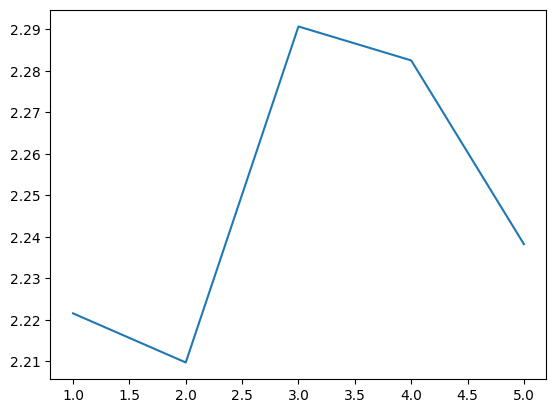

In [28]:
epochs=np.arange(5)+1
plt.plot(epochs,losses)

C:\Users\karti\AppData\Local\Temp\ipykernel_4264\791818895.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in  plt.gca().get_yticks()])
C:\Users\karti\AppData\Local\Temp\ipykernel_4264\791818895.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


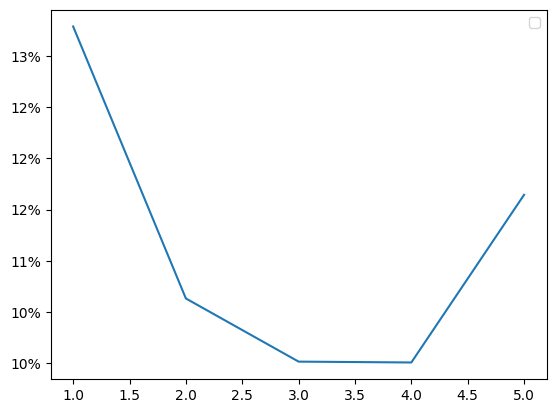

In [31]:
plt.plot(epochs,accuracies)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in  plt.gca().get_yticks()])
plt.legend()